Epoch 1/10
4/4 - 1s - loss: 1.0011 - accuracy: 0.5833 - 524ms/epoch - 131ms/step
Epoch 2/10
4/4 - 0s - loss: 0.9230 - accuracy: 0.7667 - 12ms/epoch - 3ms/step
Epoch 3/10
4/4 - 0s - loss: 0.8549 - accuracy: 0.8000 - 10ms/epoch - 3ms/step
Epoch 4/10
4/4 - 0s - loss: 0.7940 - accuracy: 0.8000 - 11ms/epoch - 3ms/step
Epoch 5/10
4/4 - 0s - loss: 0.7413 - accuracy: 0.8000 - 11ms/epoch - 3ms/step
Epoch 6/10
4/4 - 0s - loss: 0.6955 - accuracy: 0.8000 - 11ms/epoch - 3ms/step
Epoch 7/10
4/4 - 0s - loss: 0.6565 - accuracy: 0.8083 - 12ms/epoch - 3ms/step
Epoch 8/10
4/4 - 0s - loss: 0.6225 - accuracy: 0.8083 - 12ms/epoch - 3ms/step
Epoch 9/10
4/4 - 0s - loss: 0.5916 - accuracy: 0.8083 - 12ms/epoch - 3ms/step
Epoch 10/10
4/4 - 0s - loss: 0.5658 - accuracy: 0.8167 - 12ms/epoch - 3ms/step
1/1 [==============================] - 0s 126ms/step - loss: 0.5140 - accuracy: 0.8667
Test loss: 0.5139631628990173
Test accuracy: 0.8666666746139526
1/1 [==============================] - 0s 57ms/step
Test accuracy

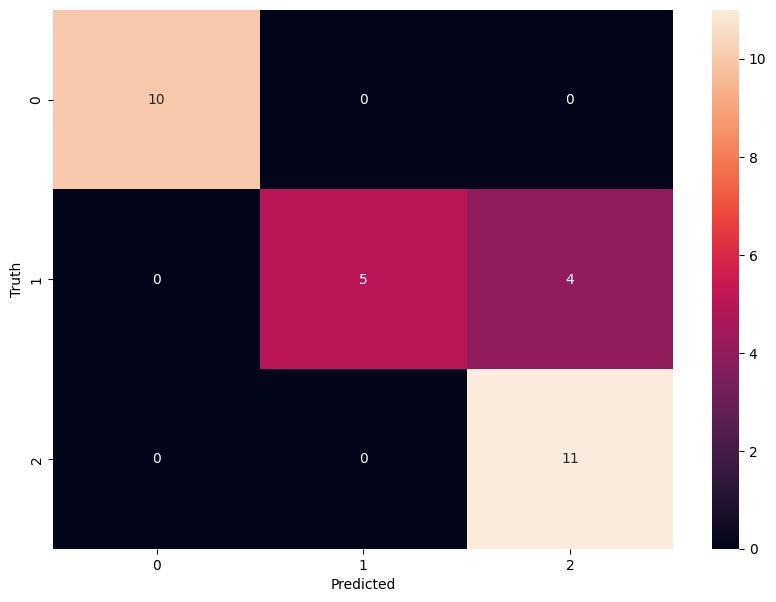

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, verbose=2)


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


accuracy = accuracy_score(y_test, y_predicted_labels)
cm = confusion_matrix(y_test, y_predicted_labels)

print('Test accuracy:', accuracy)
print('Confusion Matrix:\n', cm)


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
